# Run 1 : Baseline

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Chargement des données d'apprentissage et de test

In [2]:
df_train = pd.read_csv("../data/train.csv", sep=',', encoding='utf-8')
df_validation = pd.read_csv("../data/validation.csv", sep=',', encoding='utf-8')
df_test = pd.read_csv("../data/test.csv", sep=',', encoding='utf-8')

### Prédiction de manière aléatoire

In [6]:
x = df_train[['titre', 'ingredients','recette']]
y = df_train["type"]

x_test = df_test[['titre', 'ingredients','recette']]
y_test = df_test["type"]

y_pred = np.random.choice(y, size=len(x_test))

#### Résultats

In [7]:
score = accuracy_score(y_pred,y_test)
print("Accuracy:", score, "\n")
print(classification_report(y_test, y_pred), "\n")

Accuracy: 0.3703170028818444 

                precision    recall  f1-score   support

       Dessert       0.30      0.31      0.31       407
        Entrée       0.27      0.25      0.26       337
Plat principal       0.46      0.47      0.46       644

      accuracy                           0.37      1388
     macro avg       0.35      0.34      0.34      1388
  weighted avg       0.37      0.37      0.37      1388
 



<Axes: >

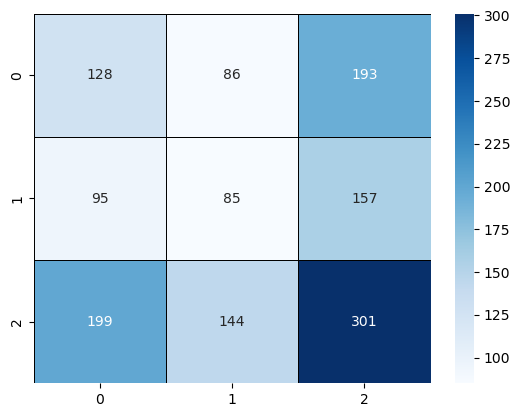

In [8]:
import seaborn as sns 
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black")
